# Import Required Libraries
Import the necessary Python libraries for data analysis, visualization, and modeling.

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set_style('whitegrid')

# Load and Explore the Dataset
Load the battery dataset CSV files, examine their structure, and perform initial exploratory data analysis including summary statistics and checking for missing values.

In [3]:
# Load and Explore the Dataset

# Load the dataset
file_path = 'data/VAH01.csv'  # Update this path to your dataset location
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
0,0.000000,3.538717,1491.3828,0.000000,0.000000,0.0,0.0,21.139246,0,0
1,10.000000,3.545570,1492.1708,0.014693,4.144108,0.0,0.0,21.115524,0,0
2,20.000001,3.549980,1491.5797,0.029405,8.288285,0.0,0.0,21.305294,0,0
3,30.000001,3.553131,1492.3679,0.044130,12.432512,0.0,0.0,21.574135,0,0
4,40.000002,3.555572,1490.9886,0.058865,16.576689,0.0,0.0,21.510880,0,0


In [4]:
# Display summary statistics of the dataset
data.describe()

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
count,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06,1.091477e+06
mean,2.135044e+06,3.715903e+00,-2.279909e+03,6.999939e+00,1.958083e+02,-3.981751e+00,1.081291e+03,2.936995e+01,7.794272e+01,4.988582e+00
std,1.733081e+06,2.865061e-01,4.295483e+03,1.159419e+00,5.260892e+02,2.717832e+00,7.465300e+02,5.718766e+00,7.832924e+01,2.008390e+00
min,0.000000e+00,2.499993e+00,-2.162262e+04,0.000000e+00,0.000000e+00,-1.126279e+01,0.000000e+00,1.998481e+01,0.000000e+00,0.000000e+00
25%,8.079988e+05,3.609171e+00,-4.206342e+03,7.044381e+00,0.000000e+00,-6.262286e+00,4.374040e+02,2.499791e+01,3.000000e+00,5.000000e+00
50%,1.671703e+06,3.687619e+00,-6.099977e+02,7.127179e+00,0.000000e+00,-4.037409e+00,1.065582e+03,2.910961e+01,5.400000e+01,5.000000e+00
75%,3.158005e+06,3.874168e+00,0.000000e+00,7.196585e+00,0.000000e+00,-1.645630e+00,1.759669e+03,3.144220e+01,1.410000e+02,7.000000e+00
max,6.370155e+06,4.200207e+00,2.995802e+03,1.176882e+01,3.027442e+03,0.000000e+00,3.089338e+03,6.794930e+01,2.490000e+02,9.000000e+00


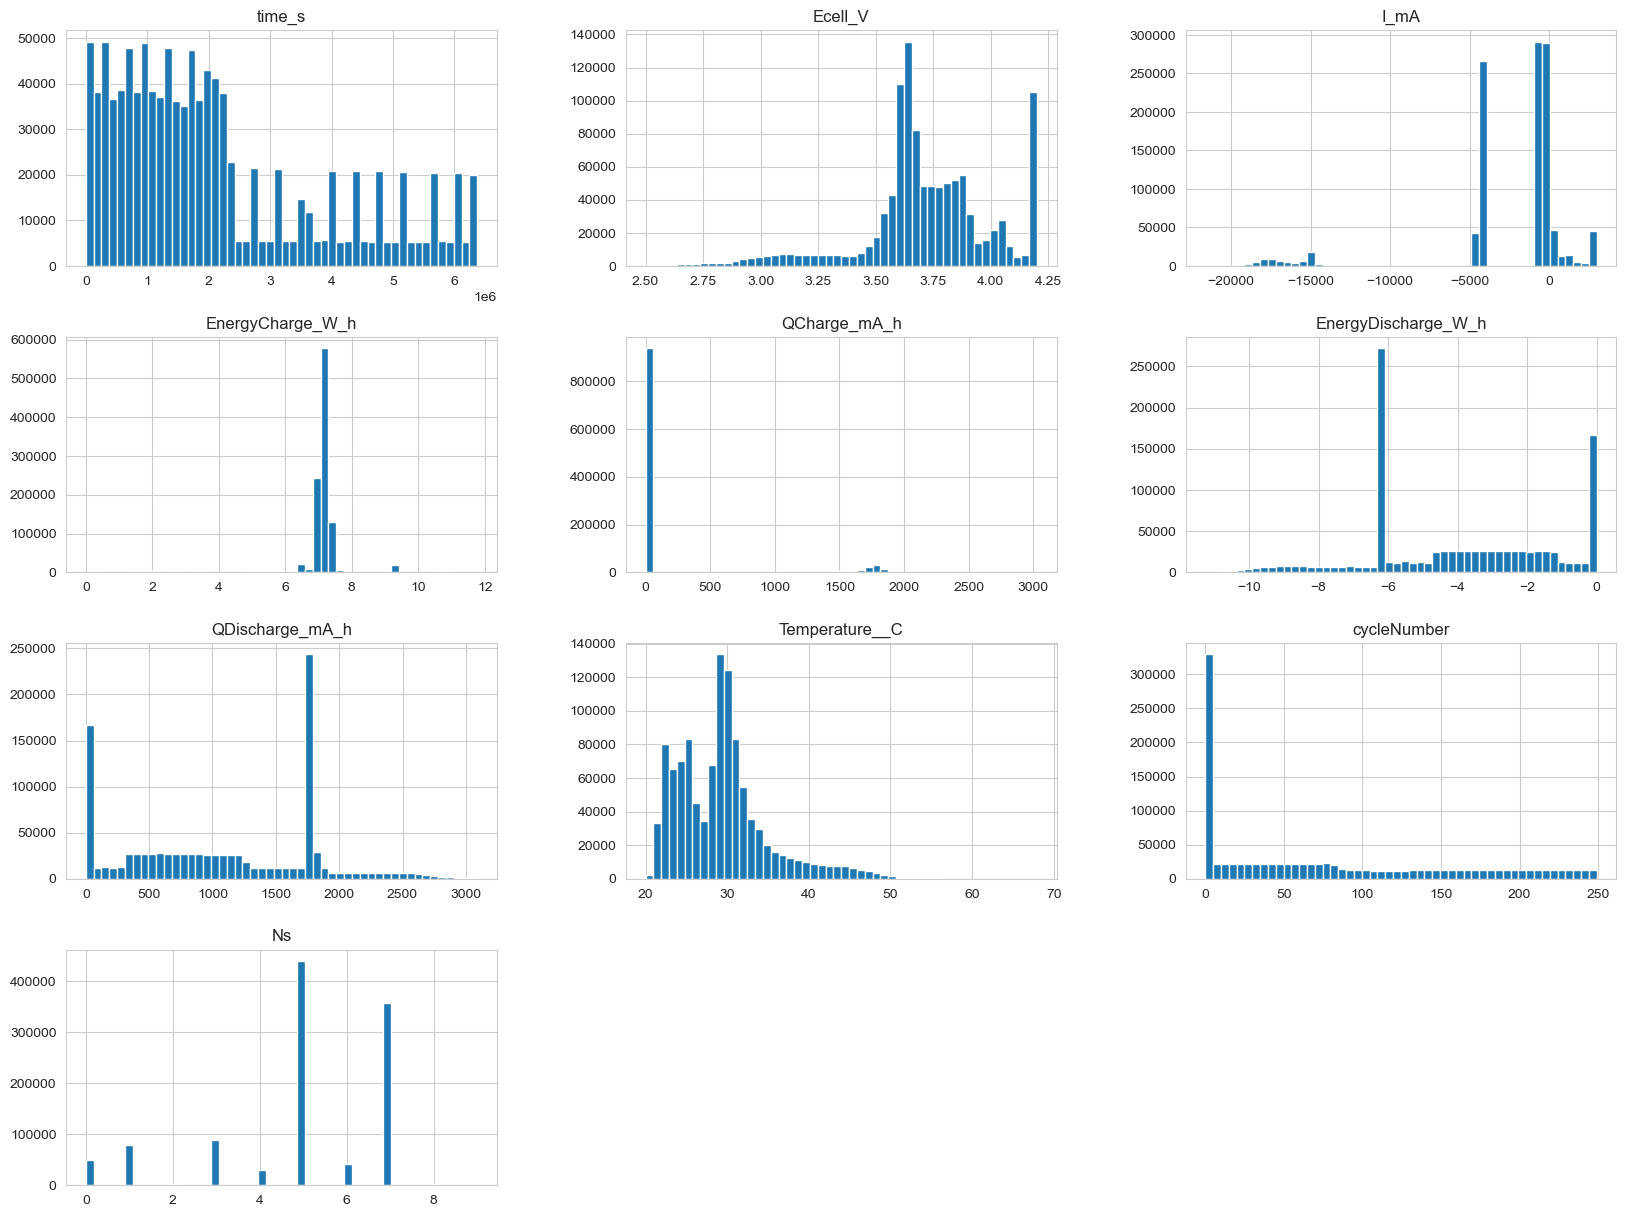

In [5]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

# Plot the distribution of each feature
data.hist(bins=50, figsize=(20, 15))
plt.show()

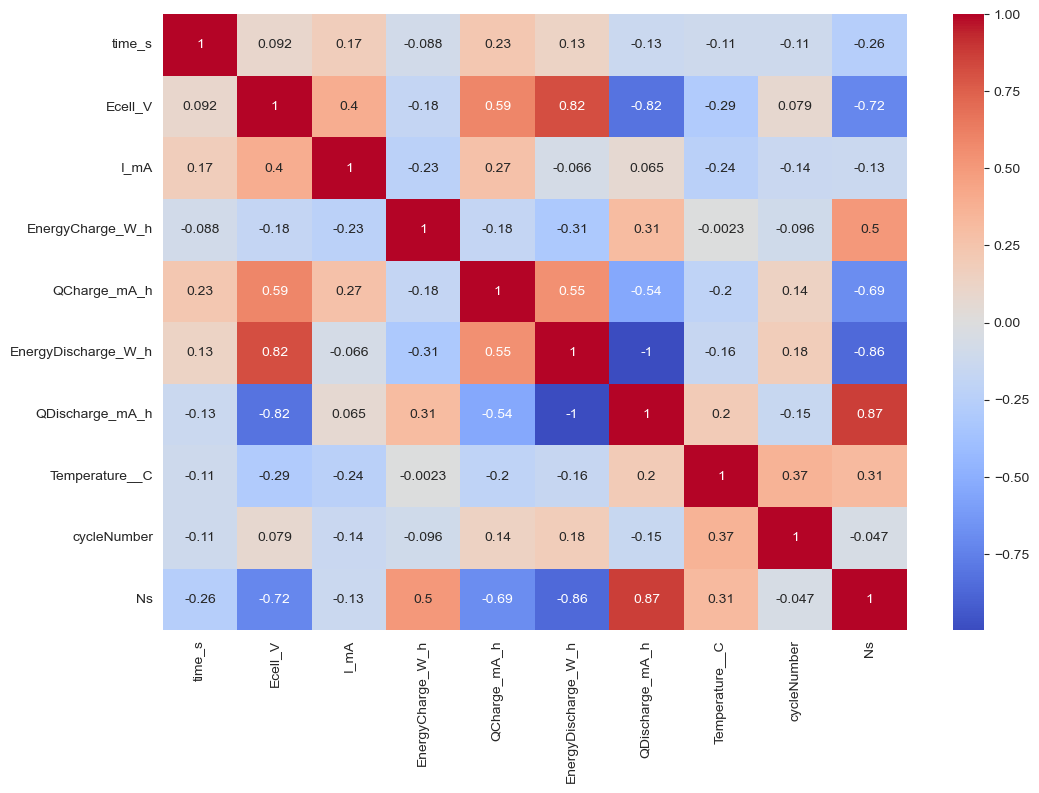

In [6]:
# Plot the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Visualize Battery Cycles
Create visualizations of voltage-current profiles, charge-discharge cycles, and temperature patterns across different experimental protocols.

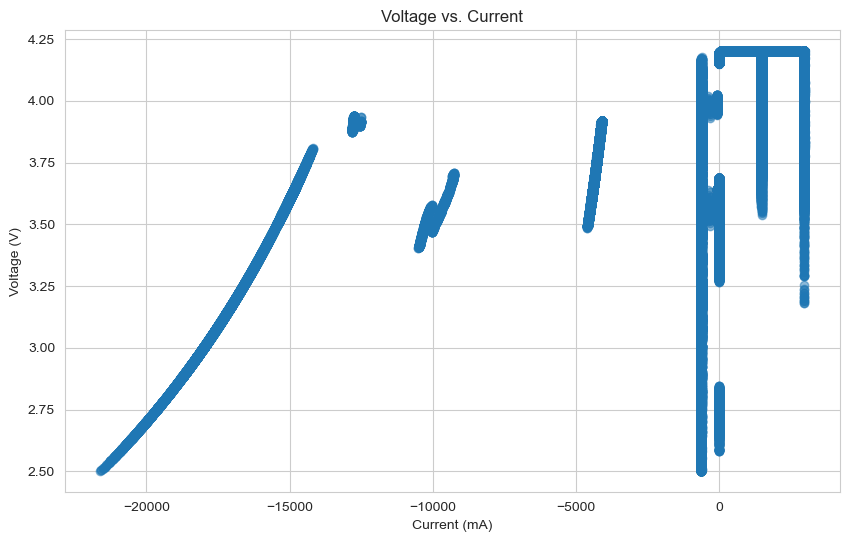

In [7]:
# Visualize Battery Cycles

# Plot voltage vs. current for the entire dataset
plt.figure(figsize=(10, 6))
plt.scatter(data['I_mA'], data['Ecell_V'], alpha=0.5)
plt.title('Voltage vs. Current')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.show()

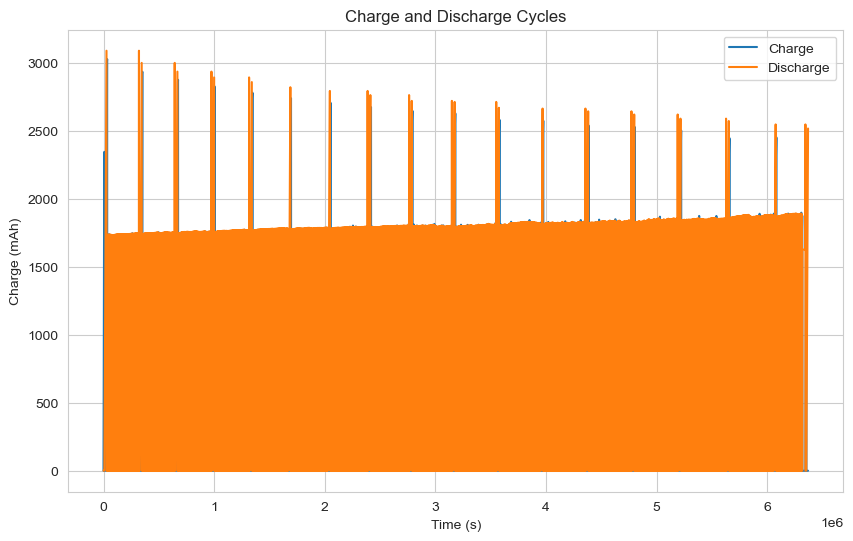

In [8]:
# Plot charge and discharge cycles
plt.figure(figsize=(10, 6))
plt.plot(data['time_s'], data['QCharge_mA_h'], label='Charge')
plt.plot(data['time_s'], data['QDischarge_mA_h'], label='Discharge')
plt.title('Charge and Discharge Cycles')
plt.xlabel('Time (s)')
plt.ylabel('Charge (mAh)')
plt.legend()
plt.show()

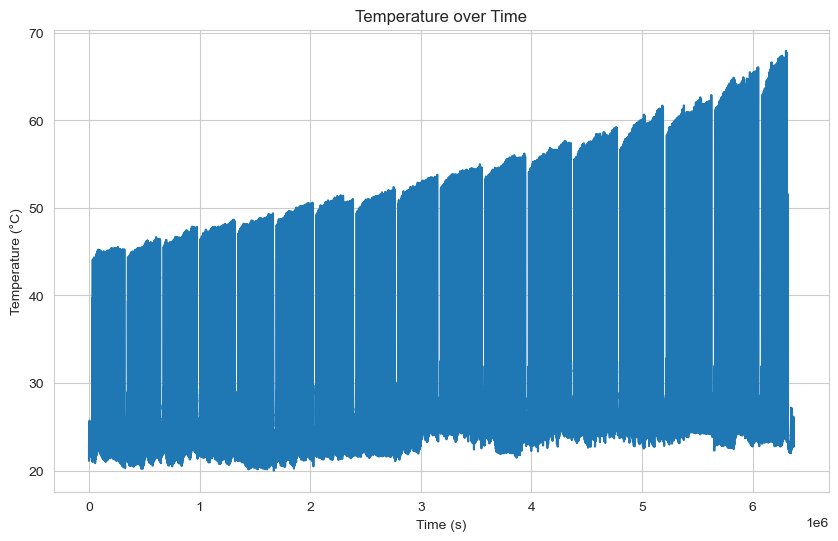

In [9]:
# Plot temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data['time_s'], data['Temperature__C'])
plt.title('Temperature over Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.show()

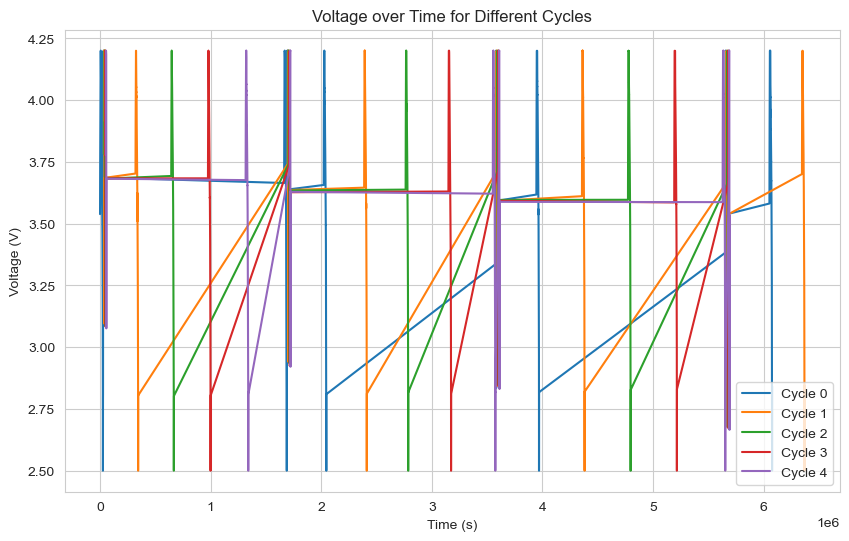

In [10]:
# Plot voltage over time for different cycles
unique_cycles = data['cycleNumber'].unique()
plt.figure(figsize=(10, 6))
for cycle in unique_cycles[:5]:  # Plotting only the first 5 cycles for clarity
    cycle_data = data[data['cycleNumber'] == cycle]
    plt.plot(cycle_data['time_s'], cycle_data['Ecell_V'], label=f'Cycle {cycle}')
plt.title('Voltage over Time for Different Cycles')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# Extract Features from Time Series Data
Extract meaningful features from the time series data such as charge/discharge capacity, energy efficiency, voltage drop rates, and temperature effects.

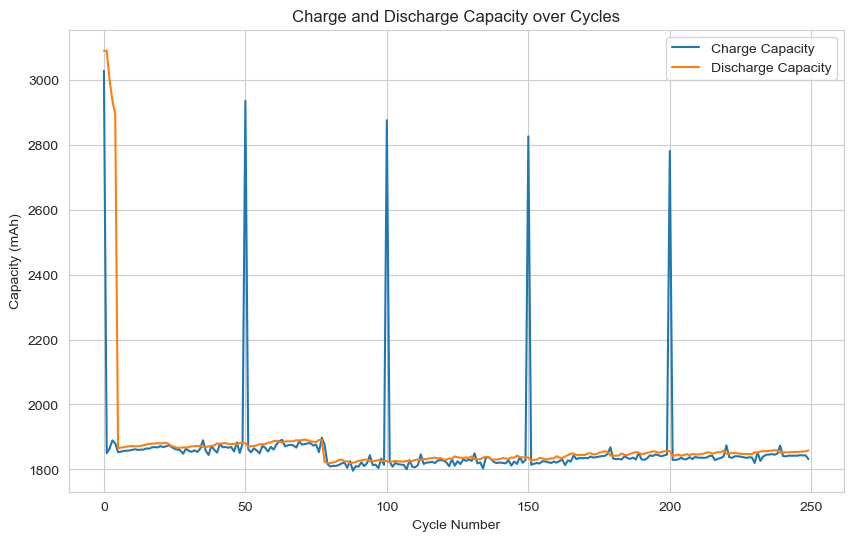

In [12]:
# Extract Features from Time Series Data

# Function to extract features from the dataset
def extract_features(df):
    features = {}
    
    # Charge capacity (mAh)
    features['charge_capacity'] = df['QCharge_mA_h'].max()
    
    # Discharge capacity (mAh)
    features['discharge_capacity'] = df['QDischarge_mA_h'].max()
    
    # Energy efficiency (discharge energy / charge energy)
    features['energy_efficiency'] = df['EnergyDischarge_W_h'].sum() / df['EnergyCharge_W_h'].sum()
    
    # Voltage drop rate (V/s)
    voltage_diff = df['Ecell_V'].diff().dropna()
    time_diff = df['time_s'].diff().dropna()
    features['voltage_drop_rate'] = (voltage_diff / time_diff).mean()
    
    # Average temperature (°C)
    features['avg_temperature'] = df['Temperature__C'].mean()
    
    return features

# Apply the feature extraction function to each cycle
cycle_features = []
for cycle in unique_cycles:
    cycle_data = data[data['cycleNumber'] == cycle]
    features = extract_features(cycle_data)
    features['cycleNumber'] = cycle
    cycle_features.append(features)

# Convert the list of dictionaries to a DataFrame
features_df = pd.DataFrame(cycle_features)

# Display the extracted features
features_df.head()

# Plot the extracted features
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['charge_capacity'], label='Charge Capacity')
plt.plot(features_df['cycleNumber'], features_df['discharge_capacity'], label='Discharge Capacity')
plt.title('Charge and Discharge Capacity over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (mAh)')
plt.legend()
plt.show()

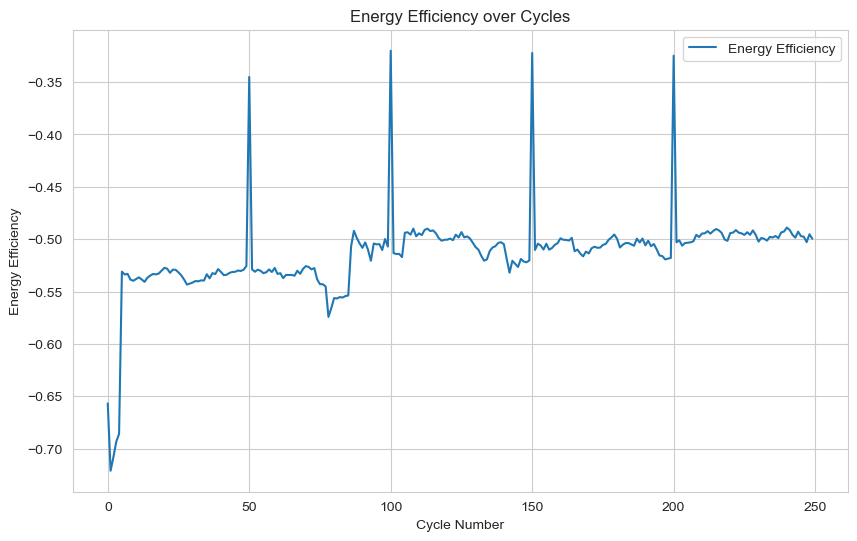

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['energy_efficiency'], label='Energy Efficiency')
plt.title('Energy Efficiency over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Energy Efficiency')
plt.legend()
plt.show()

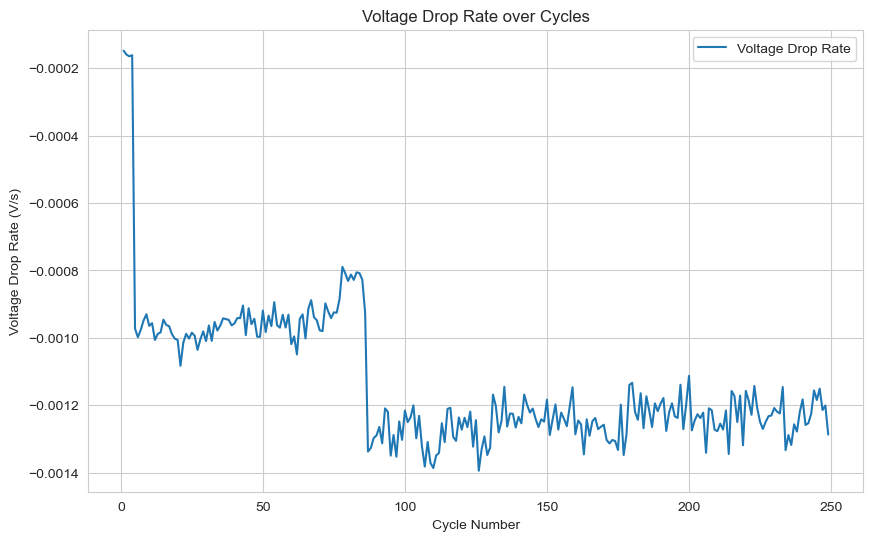

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['voltage_drop_rate'], label='Voltage Drop Rate')
plt.title('Voltage Drop Rate over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Voltage Drop Rate (V/s)')
plt.legend()
plt.show()

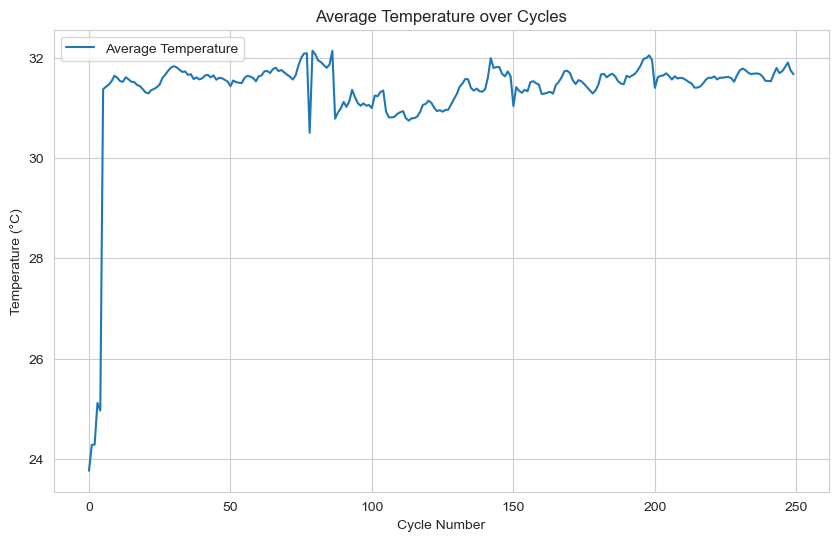

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['avg_temperature'], label='Average Temperature')
plt.title('Average Temperature over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Analyze Degradation Patterns
Analyze capacity fade over cycles, identify degradation patterns under different experimental conditions, and compare performance across protocols.

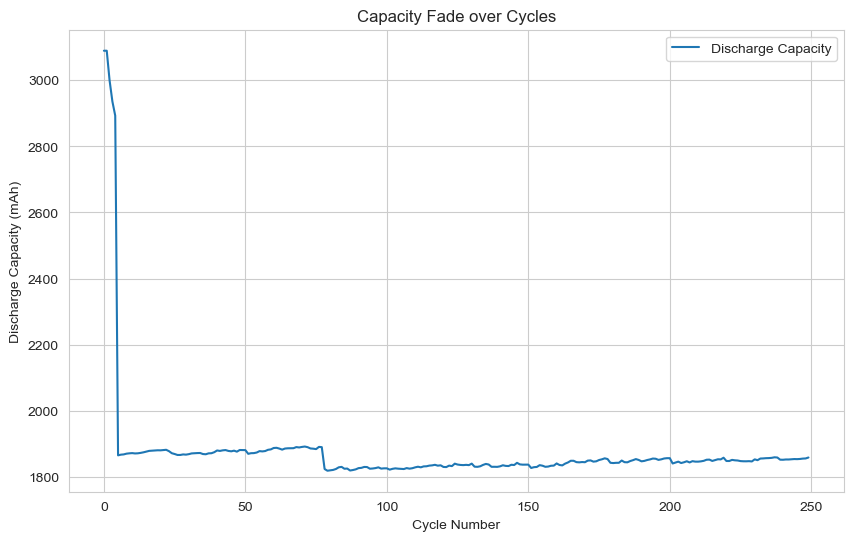

In [16]:
# Analyze Degradation Patterns

# Plot capacity fade over cycles
plt.figure(figsize=(10, 6))
plt.plot(features_df['cycleNumber'], features_df['discharge_capacity'], label='Discharge Capacity')
plt.title('Capacity Fade over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (mAh)')
plt.legend()
plt.show()

In [18]:
# Identify degradation patterns under different experimental conditions
# Load additional datasets
file_paths = ['data/VAH02.csv', 'data/VAH05.csv', 'data/VAH06.csv']  # Update these paths to your dataset locations
datasets = [pd.read_csv(file_path) for file_path in file_paths]

# Extract features from each dataset
all_features = []
for i, dataset in enumerate(datasets):
    cycle_features = []
    unique_cycles = dataset['cycleNumber'].unique()
    for cycle in unique_cycles:
        cycle_data = dataset[dataset['cycleNumber'] == cycle]
        features = extract_features(cycle_data)
        features['cycleNumber'] = cycle
        features['protocol'] = f'VAH{str(i+2).zfill(2)}'
        cycle_features.append(features)
    all_features.extend(cycle_features)

# Convert the list of dictionaries to a DataFrame
all_features_df = pd.DataFrame(all_features)



/Users/christopher/mambaforge/envs/ramp/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


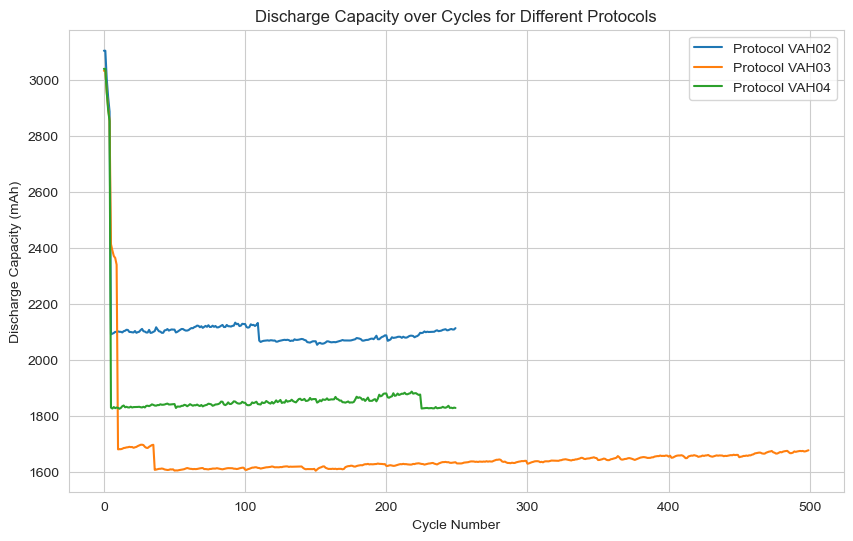

In [19]:
# Compare performance across protocols
plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['discharge_capacity'], label=f'Protocol {protocol}')
plt.title('Discharge Capacity over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (mAh)')
plt.legend()
plt.show()

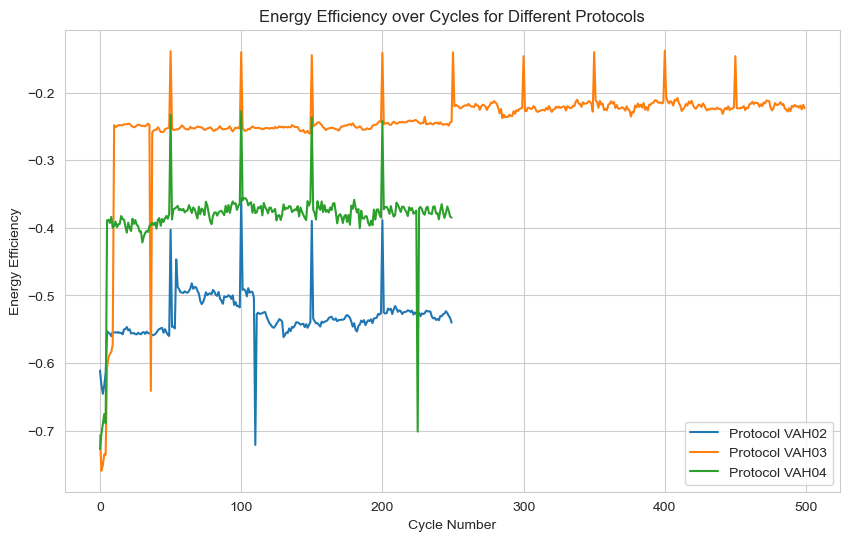

In [20]:

plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['energy_efficiency'], label=f'Protocol {protocol}')
plt.title('Energy Efficiency over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Energy Efficiency')
plt.legend()
plt.show()

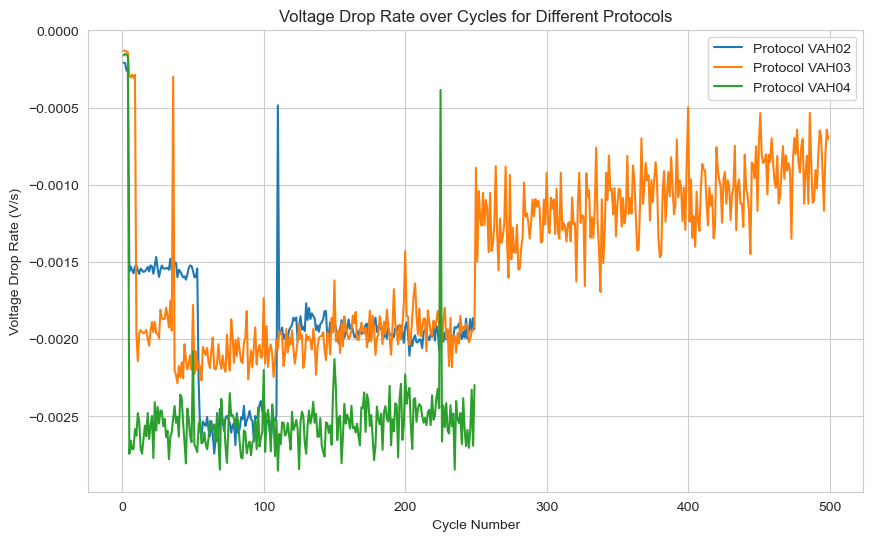

In [21]:
plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['voltage_drop_rate'], label=f'Protocol {protocol}')
plt.title('Voltage Drop Rate over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Voltage Drop Rate (V/s)')
plt.legend()
plt.show()

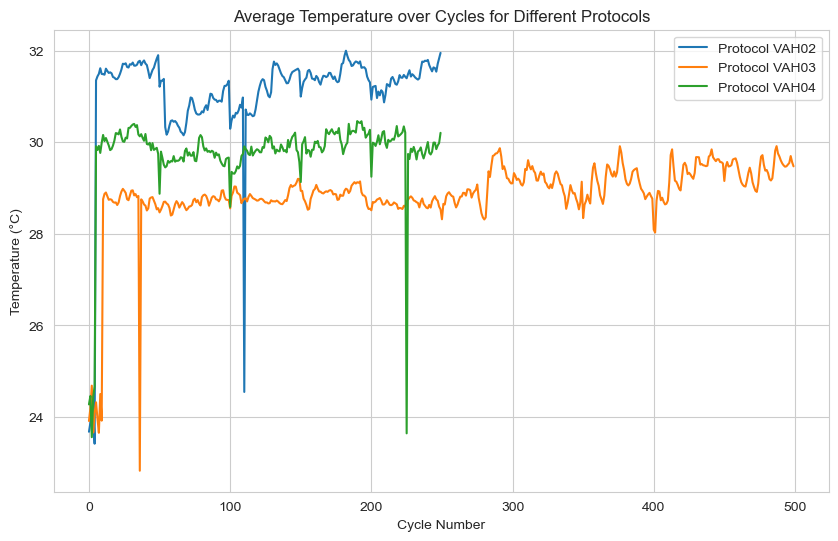

In [22]:
plt.figure(figsize=(10, 6))
for protocol in all_features_df['protocol'].unique():
    protocol_data = all_features_df[all_features_df['protocol'] == protocol]
    plt.plot(protocol_data['cycleNumber'], protocol_data['avg_temperature'], label=f'Protocol {protocol}')
plt.title('Average Temperature over Cycles for Different Protocols')
plt.xlabel('Cycle Number')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Prepare Data for Modeling
Transform the extracted features into a format suitable for machine learning models, including creating cycle-level features, handling missing data, and preparing training/testing splits.

In [27]:
# Prepare Data for Modeling

# First, check if 'cycleNumber' exists
if 'cycleNumber' not in features_df.columns:
    print("Warning: 'cycleNumber' column not found in features_df")
    # If it doesn't exist, we'll modify the code accordingly
    columns_to_drop = []
else:
    columns_to_drop = ['cycleNumber']

# Handle missing data by filling with the mean value of each column
features_df.fillna(features_df.mean(), inplace=True)

# Check for any remaining NaN values or infinite values
if features_df.isnull().sum().sum() > 0:
    print("Warning: There are still NaN values after filling with mean")
    # More aggressive approach to handle NaNs
    features_df = features_df.dropna(axis=1)  # Drop columns with remaining NaNs

# Replace any infinite values
features_df = features_df.replace([np.inf, -np.inf], np.nan)
features_df.fillna(features_df.mean(), inplace=True)

# Make sure all columns to be scaled are numeric
numeric_cols = features_df.select_dtypes(include=np.number).columns
features_to_scale = features_df[numeric_cols].drop(columns=columns_to_drop, errors='ignore')

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add back the cycleNumber if it exists
if 'cycleNumber' in features_df.columns:
    scaled_features_df['cycleNumber'] = features_df['cycleNumber'].values

# Split the data into training and testing sets
X = scaled_features_df.drop(columns=['discharge_capacity'], errors='ignore')
y = scaled_features_df['discharge_capacity'] if 'discharge_capacity' in scaled_features_df.columns else features_df['discharge_capacity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 5), (50, 5), (200,), (50,))

# Benchmark Model Implementation
Implement a baseline model to predict battery degradation or remaining useful life using scikit-learn pipelines.

In [28]:
# Benchmark Model Implementation

# Define the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.000975925247280763
R^2 Score: 0.9293673306206214


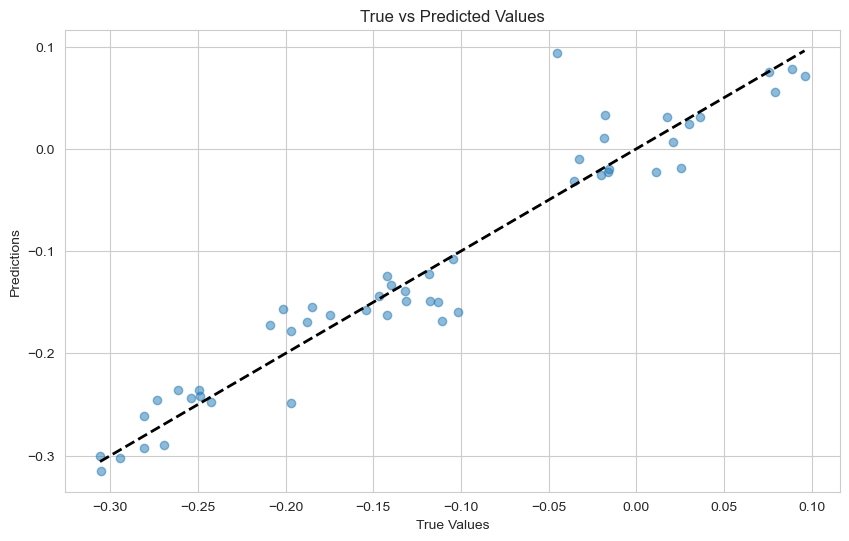

In [29]:
# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()